In [1]:
!pip install pandas

You should consider upgrading via the 'c:\users\82102\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams['font.family'] = 'Malgun Gothic'

In [3]:
food = pd.read_csv('./data/food.csv')
food = food.drop(['Unnamed: 0','기준년코드'], axis=1)

df = food[['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명',
     '서비스업종코드', '서비스업종코드명','총직장인구수', '총유동인구수']]
df

,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,총직장인구수,총유동인구수
0,4,1,관광특구,1001491,이태원 관광특구,2,중식음식점,5839,1498484
1,4,2,전통시장,1001490,길동복조리시장,9,호프-간이주점,430,873376
2,4,2,전통시장,1001490,길동복조리시장,3,일식음식점,430,873376
3,4,2,전통시장,1001489,둔촌역전통시장,8,분식전문점,224,252938
4,4,2,전통시장,1001489,둔촌역전통시장,2,중식음식점,224,252938
...,...,...,...,...,...,...,...,...,...
10915,1,4,골목상권,1000002,난계로27길,9,호프-간이주점,201,347131
10916,1,4,골목상권,1000002,난계로27길,2,중식음식점,201,347131
10917,1,4,골목상권,1000001,계동길,4,양식음식점,842,336343
10918,1,4,골목상권,1000001,계동길,3,일식음식점,842,336343


In [4]:
food_multi = food.set_index(['기준분기코드','상권구분코드명','상권코드명','서비스업종코드명']).sort_index()

In [5]:
# food_multi.drop(food_multi.filter(regex='코드').columns, inplace=True, axis=1)
DailySales = food_multi.filter(regex='요일매출금액')
DailySales

월요일매출금액     화요일매출금액   수요일매출금액   목요일매출금액  \
기준분기코드 상권구분코드명 상권코드명     서비스업종코드명                                             
1      골목상권    가로공원로58길  한식음식점      2957296   1150941.0    542118   2643881   
               가로공원로76가길 분식전문점      2350062    863114.0   1888596    470012   
                         중식음식점      7883035   9007514.0   7127928   9601313   
                         한식음식점     16096393   3840378.0  14369879  17383002   
                         호프-간이주점    7186774   3091462.0   7751808   8085730   
...                                     ...         ...       ...       ...   
4      전통시장    회기시장      호프-간이주점    3120105   4162898.0   2594193   6126601   
               흑석시장      분식전문점     13314805   9386201.0  10204283   8664998   
                         일식음식점      3559057   4077778.0   4304834   5663478   
                         중식음식점     28570570  25946676.0  31287461  31091900   
                         호프-간이주점   53777487  65131253.0  66257183  63456804   

                                    금요일매출금액   토요일매출금액   일요일매출금액  
기준분기코드 상권구분코드명 상권코드명     서비스업종코드명                                
1      골목상권    가로공원로58길  한식음식점      1833882   1722706   2117647  
               가로공원로76가길 분식전문점      1662135   2606432   1380128  
                         중식음식점      6714140  10218490  15008626  
                         한식음식점     24614605  31719335  20830982  
                         호프-간이주점   13048261  23830782   6483786  
...                                     ...       ...       ...  
4      전통시장    회기시장      호프-간이주점    7548892   7709601   3275095  
               흑석시장      분식전문점      9522234   8961675   5052876  
                         일식음식점      9780020   6073286         0  
                         중식음식점     39030064  27607224  29697758  
                         호프-간이주점   61507931  74553102  28683499  

[10920 rows x 7 columns]

In [6]:
food_multi_quarter = food.set_index(['상권구분코드명','서비스업종코드명','기준분기코드']).sort_index()

In [7]:
food_quarter =food_multi_quarter.filter(regex='요일매출금액')
food_quarter

월요일매출금액     화요일매출금액   수요일매출금액   목요일매출금액   금요일매출금액  \
상권구분코드명 서비스업종코드명 기준분기코드                                                       
골목상권    분식전문점    1        3511491   5651051.0   5593172   5422655   5618908   
                 1        7630286   4188791.0   6567773   3382497  23579154   
                 1        2638071   3550114.0   2721350   2355997   2640758   
                 1        6398536   5132287.0   5509103   4513232   6826738   
                 1        8743451   7972491.0   9848133   8782431  11372589   
...                           ...         ...       ...       ...       ...   
전통시장    호프-간이주점  4       61531451  42335703.0  56130966  72486394  76781387   
                 4       24927040  36860047.0  25261511  33066670  39338924   
                 4              0         0.0         0   5341659         0   
                 4       11355790  22186890.0   9369464   7195748  20238040   
                 4        2032906   2665790.0   2675381   2445241   1960986   

                          토요일매출금액   일요일매출금액  
상권구분코드명 서비스업종코드명 기준분기코드                      
골목상권    분식전문점    1        6403998   3798725  
                 1        6831975   1239814  
                 1        1844231         0  
                 1        4048328         0  
                 1        6626577   7897053  
...                           ...       ...  
전통시장    호프-간이주점  4       76510050  51813159  
                 4       42729269  18656151  
                 4              0    890277  
                 4       12255259   5246900  
                 4        1083577   1855506  

[10920 rows x 7 columns]

In [8]:
Quarter1 = food_quarter.xs(1, level=2).sum()
Quarter2 = food_quarter.xs(2, level=2).sum()
Quarter3 = food_quarter.xs(3, level=2).sum()
Quarter4 = food_quarter.xs(4, level=2).sum()

In [9]:
import numpy as np

In [10]:
QuarterSales = {}
QuarterSales['1분기'] = np.array(Quarter1)
QuarterSales['2분기'] = np.array(Quarter2)
QuarterSales['3분기'] = np.array(Quarter3)
QuarterSales['4분기'] = np.array(Quarter4)

<AxesSubplot:>

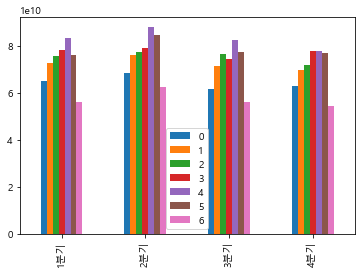

In [11]:
pd.DataFrame(QuarterSales).T.plot(kind='bar')

In [7]:
tem = pd.read_csv('./data/상권_행정동코드.csv')
tem

,상권_코드,행정동_코드
0,1001453,11620585
1,1001454,11620595
2,1001474,11680650
3,1001475,11680670
4,1001412,11500590
...,...,...
1491,1001044,11650520
1492,1001030,11650651
1493,1001031,11620645
1494,1001032,11620645


In [8]:
tem.columns = tem.columns.str.replace('_','')

In [9]:
f = pd.merge(food, tem, on=['상권코드'])

In [10]:
f.to_csv('./data/f.csv', encoding='utf-8-sig')

## Heatmap

In [16]:
# 한 건당 금액이라는 새로운 칼럼추가 해봤음
f['분기당건수별매출금액'] = f['분기당매출금액']/f['분기당매출건수']

In [18]:
# 일단 전체 상관관계 표 만듦
cor = f.corr()

In [19]:
# 매출 관련자료를 모두 y에, 나머지는 x에 남겨둠(매출과 매출끼리는 상관관계가 너무 높아서 방해됨)
y = cor.filter(regex='매출').columns
x = cor[cor.columns.difference(y)].columns

In [20]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [22]:
cor_xy = cor.loc[x,y]

In [23]:
display_side_by_side(cor_xy[['주중매출금액']].sort_values(by='주중매출금액',ascending=False)[:20], cor_xy[['주말매출금액']].sort_values(by='주말매출금액', ascending=False)[:20])

,주중매출금액
점포수,0.685146
유사업종점포수,0.684368
연령대30직장인구수,0.276782
남성연령대40직장인구수,0.271926
남성연령대30직장인구수,0.268662
여성연령대30직장인구수,0.266698
남성직장인구수,0.261889
개업점포수,0.260651
총직장인구수,0.257281
연령대40직장인구수,0.250382


<AxesSubplot:>

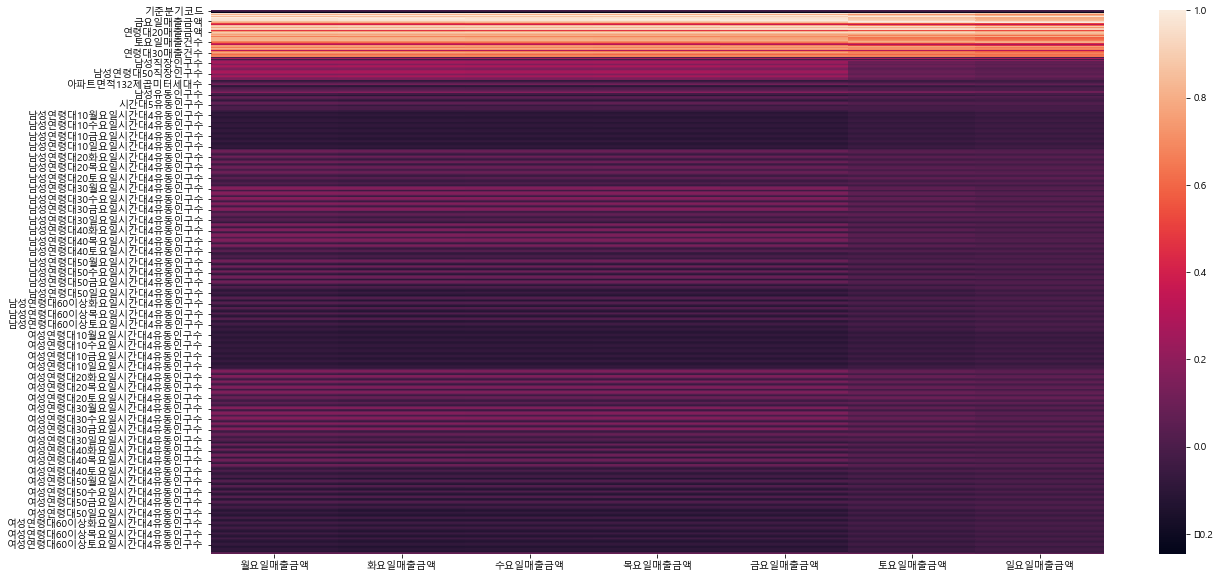

In [24]:
import seaborn as sns

cor_d = cor[['월요일매출금액', '화요일매출금액','수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액']]

fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor_d)

In [25]:
Y = f.filter(regex='매출')
X = f.drop(f.filter(regex='매출').columns.tolist(), axis=1)
X = X.drop(X.filter(regex='명').columns.tolist(), axis=1)

In [26]:
for x in X:
    print(x, end=', ')

기준분기코드, 상권구분코드, 상권코드, 서비스업종코드, 점포수, 유사업종점포수, 개업율, 개업점포수, 폐업률, 폐업점포수, 프랜차이즈점포수, 총직장인구수, 남성직장인구수, 여성직장인구수, 연령대10직장인구수, 연령대20직장인구수, 연령대30직장인구수, 연령대40직장인구수, 연령대50직장인구수, 연령대60이상직장인구수, 남성연령대10직장인구수, 남성연령대20직장인구수, 남성연령대30직장인구수, 남성연령대40직장인구수, 남성연령대50직장인구수, 남성연령대60이상직장인구수, 여성연령대10직장인구수, 여성연령대20직장인구수, 여성연령대30직장인구수, 여성연령대40직장인구수, 여성연령대50직장인구수, 여성연령대60이상직장인구수, 아파트단지수, 아파트면적66제곱미터미만세대수, 아파트면적66제곱미터세대수, 아파트면적99제곱미터세대수, 아파트면적132제곱미터세대수, 아파트면적165제곱미터세대수, 아파트가격1억미만세대수, 아파트가격1억세대수, 아파트가격2억세대수, 아파트가격3억세대수, 아파트가격4억세대수, 아파트가격5억세대수, 아파트가격6억이상세대수, 아파트평균면적, 아파트평균시가, 총유동인구수, 남성유동인구수, 여성유동인구수, 연령대10유동인구수, 연령대20유동인구수, 연령대30유동인구수, 연령대40유동인구수, 연령대50유동인구수, 연령대60이상유동인구수, 시간대1유동인구수, 시간대2유동인구수, 시간대3유동인구수, 시간대4유동인구수, 시간대5유동인구수, 시간대6유동인구수, 월요일유동인구수, 화요일유동인구수, 수요일유동인구수, 목요일유동인구수, 금요일유동인구수, 토요일유동인구수, 일요일유동인구수, 남성연령대10월요일시간대1유동인구수, 남성연령대10월요일시간대2유동인구수, 남성연령대10월요일시간대3유동인구수, 남성연령대10월요일시간대4유동인구수, 남성연령대10월요일시간대5유동인구수, 남성연령대10월요일시간대6유동인구수, 남성연령대10화요일시간대1유동인구수, 남성연령대10화요일시간대2유동인구수, 남성연령대10화요일시간대3유동인구수, 남성연령대10화요일시간대4유동인구수, 남성연령대

In [27]:
for y in Y:
    print(y, end=', ')

분기당매출금액, 분기당매출건수, 주중매출금액, 주말매출금액, 월요일매출금액, 화요일매출금액, 수요일매출금액, 목요일매출금액, 금요일매출금액, 토요일매출금액, 일요일매출금액, 시간대00~06매출금액, 시간대06~11매출금액, 시간대11~14매출금액, 시간대14~17매출금액, 시간대17~21매출금액, 시간대21~24매출금액, 남성매출금액, 여성매출금액, 연령대10매출금액, 연령대20매출금액, 연령대30매출금액, 연령대40매출금액, 연령대50매출금액, 연령대60이상매출금액, 주중매출건수, 주말매출건수, 월요일매출건수, 화요일매출건수, 수요일매출건수, 목요일매출건수, 금요일매출건수, 토요일매출건수, 일요일매출건수, 시간대건수~06매출건수, 시간대건수~11매출건수, 시간대건수~14매출건수, 시간대건수~17매출건수, 시간대건수~21매출건수, 시간대건수~24매출건수, 남성매출건수, 여성매출건수, 연령대10매출건수, 연령대20매출건수, 연령대30매출건수, 연령대40매출건수, 연령대50매출건수, 연령대60이상매출건수, 분기당건수별매출금액, 

In [29]:
cor1 = cor.loc[X.columns, Y.columns]

<AxesSubplot:title={'center':'분기당 매출금액과 상관관계가 높은 순으로 정렬'}>

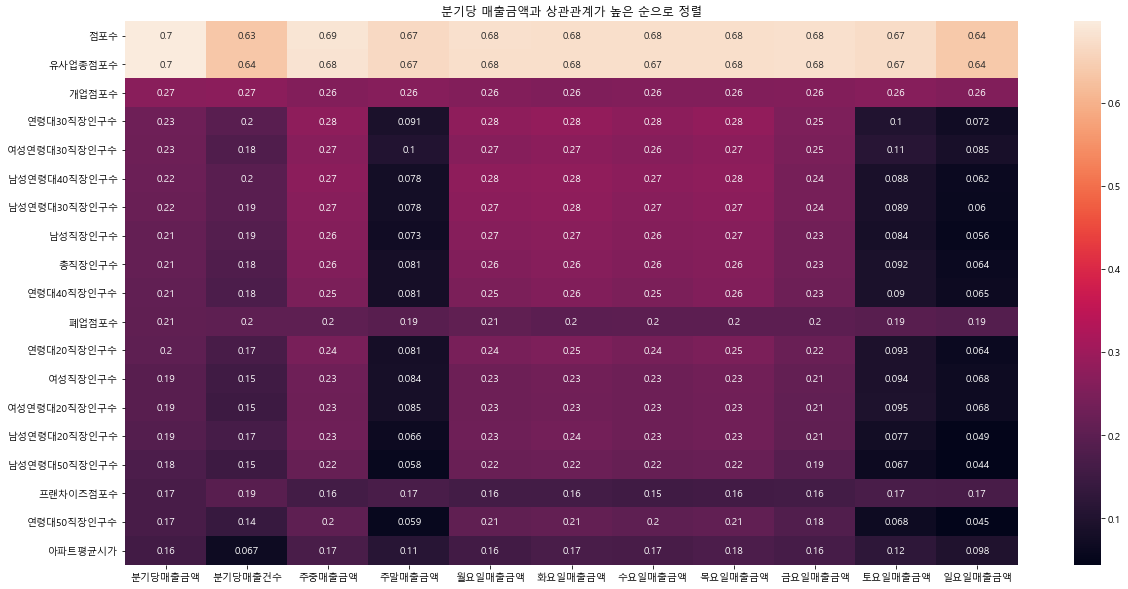

In [30]:
# 분기당 매출금액과 상관관계가 높은 순으로 정렬
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.title('분기당 매출금액과 상관관계가 높은 순으로 정렬')
sns.heatmap(cor1.sort_values(by='분기당매출금액',ascending=False).loc[:'아파트평균시가', :'일요일매출금액'], annot=True)

In [31]:
cor1.sort_values(by='분기당매출금액',ascending=False).loc[:'아파트평균시가', :'일요일매출금액']

,분기당매출금액,분기당매출건수,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,일요일매출금액
점포수,0.697640,0.634153,0.685146,0.665219,0.677238,0.677180,0.675810,0.676098,0.679169,0.670003,0.637055
유사업종점포수,0.697018,0.635042,0.684368,0.665046,0.676489,0.676460,0.674922,0.675317,0.678460,0.669704,0.637053
개업점포수,0.268849,0.272363,0.260651,0.264936,0.260069,0.255922,0.256037,0.257200,0.258875,0.264134,0.257241
연령대30직장인구수,0.230100,0.195203,0.276782,0.090521,0.278576,0.284090,0.275577,0.281763,0.251163,0.102118,0.072456
여성연령대30직장인구수,0.226319,0.179777,0.266698,0.103080,0.265455,0.271439,0.264938,0.272225,0.246191,0.114001,0.085478
남성연령대40직장인구수,0.222857,0.196682,0.271926,0.077887,0.276522,0.281144,0.271792,0.276520,0.242109,0.087967,0.062211
남성연령대30직장인구수,0.220393,0.194817,0.268662,0.077679,0.272312,0.277233,0.267877,0.273028,0.241110,0.089097,0.060269
남성직장인구수,0.214078,0.189235,0.261889,0.073105,0.265886,0.271223,0.261416,0.266089,0.233636,0.084390,0.056019
총직장인구수,0.212963,0.181047,0.257281,0.080956,0.258418,0.264993,0.256062,0.262467,0.232677,0.092186,0.063683
연령대40직장인구수,0.207774,0.176184,0.250382,0.080582,0.250727,0.257871,0.249040,0.256100,0.226573,0.090142,0.065491


<AxesSubplot:title={'center':'주말매출금액과 상관관계가 높은 순으로 정렬'}>

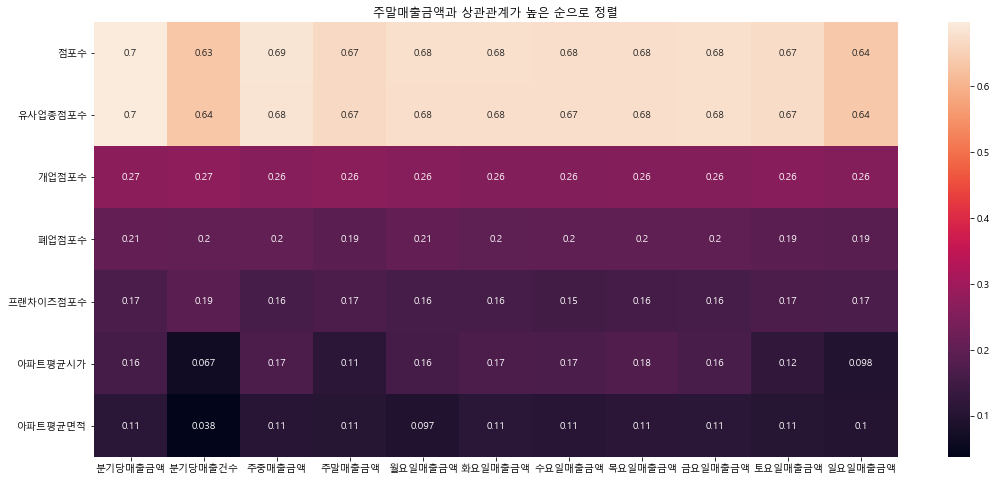

In [94]:
plt.title('주말매출금액과 상관관계가 높은 순으로 정렬')
sns.heatmap(cor1.sort_values(by='주말매출금액',ascending=False).loc[:'아파트평균면적', :'일요일매출금액'], annot=True)

In [33]:
cor_day = cor1[['월요일매출금액', '화요일매출금액','수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액']]

In [ ]:
for col in cor_day.columns:
    globals()[f'{col[0]}'] = cor_day[col].sort_values(ascending=False)[:20].index.tolist()

# 머신러닝 돌리기

In [13]:
import numpy as np

## Scaling

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression#, Ridge, Lasso

Y = f.filter(regex='매출')
X = f.drop(f.filter(regex='매출').columns.tolist(), axis=1)
X = X.drop(X.filter(regex='명').columns.tolist(), axis=1)

X = pd.get_dummies(X, columns=['기준분기코드', '상권구분코드', '상권코드', '서비스업종코드', '행정동코드'])

from sklearn import preprocessing
X_scaledStandard = preprocessing.StandardScaler().fit(X).transform(X)   # standardScaler => 통계화 시킴.
X_scaledMinMax = preprocessing.MinMaxScaler().fit(X).transform(X)

y_log = np.log1p(Y)

In [15]:
X.shape

(10920, 2185)

In [100]:
pd.DataFrame(X_scaledMinMax).describe()

,0,1,2,3,4,5,6,7,8,9,...,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185
count,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,...,10810.000000,10810.000000,10810.000000,10810.000000,10810.000000,10810.00000,10810.000000,10810.000000,10810.000000,10810.0
mean,0.063469,0.063167,0.029085,0.024964,0.017183,0.030583,0.013198,0.023927,0.027837,0.019947,...,0.000185,0.002868,0.005643,0.000370,0.002035,0.00370,0.004163,0.006383,0.001203,0.0
std,0.069479,0.069272,0.095218,0.070372,0.064267,0.082433,0.066874,0.060838,0.070038,0.056372,...,0.013601,0.053477,0.074911,0.019233,0.045069,0.06072,0.064388,0.079642,0.034659,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
25%,0.025641,0.025316,0.000000,0.000000,0.000000,0.000000,0.000000,0.003011,0.003041,0.002678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
50%,0.038462,0.037975,0.000000,0.000000,0.000000,0.000000,0.000000,0.007118,0.007699,0.006114,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
75%,0.076923,0.075949,0.000000,0.000000,0.000000,0.000000,0.000000,0.020905,0.024668,0.016270,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0


In [101]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X_scaledMinMax, y_log, test_size=0.3, random_state=0)

rf_model = RandomForestRegressor(n_estimators=50)

In [102]:
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)

In [103]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    #print('RMSLE: {0:.4f}'.format(rmsle))
    return rmsle

rmsle_rf = rmsle(y_test ,pred)
rmsle_rf = pd.DataFrame(rmsle_rf, columns=['rmsle_rf'])
rmsle_rf.to_csv('rmsle_rf')

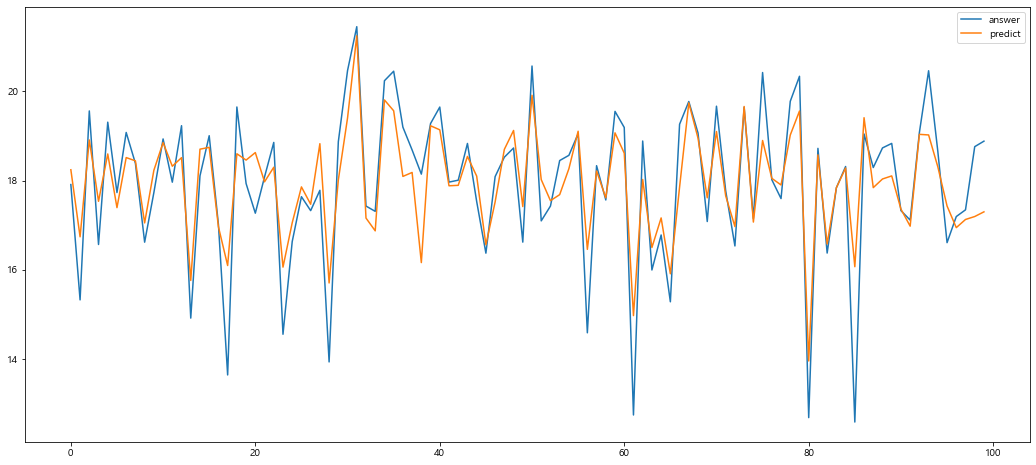

In [112]:
plt.rcParams['figure.figsize'] = 18, 8

answer = pd.DataFrame(y_test[:100].reset_index())
del answer["index"]

plt.plot(answer.iloc[:,0], label="answer")
plt.plot(rf_model.predict(X_test[:100])[:,0], label="predict")
plt.legend()

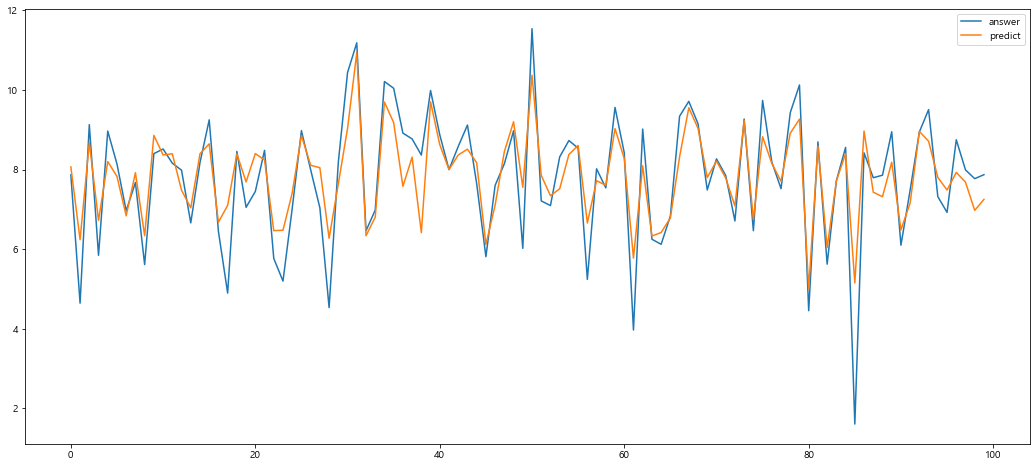

In [113]:
answer = pd.DataFrame(y_test[:100].reset_index())
del answer["index"]

plt.plot(answer.iloc[:,1], label="answer")
plt.plot(rf_model.predict(X_test[:100])[:,1], label="predict")
plt.legend()

In [106]:
X_train.shape[1]

2186

In [107]:
def plot_feature_importance(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), pd.DataFrame(X_train).columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [108]:
plt.rcParams['figure.figsize'] = 18, 20
plot_feature_importance(rf_model)

In [109]:
X_scaledMinMax.shape

(10810, 2186)

In [110]:
feature_importances_rf_model = pd.DataFrame(rf_model.feature_importances_, columns=['중요도'])
feature_importances_rf_model.index = X.columns.tolist()

<AxesSubplot:>

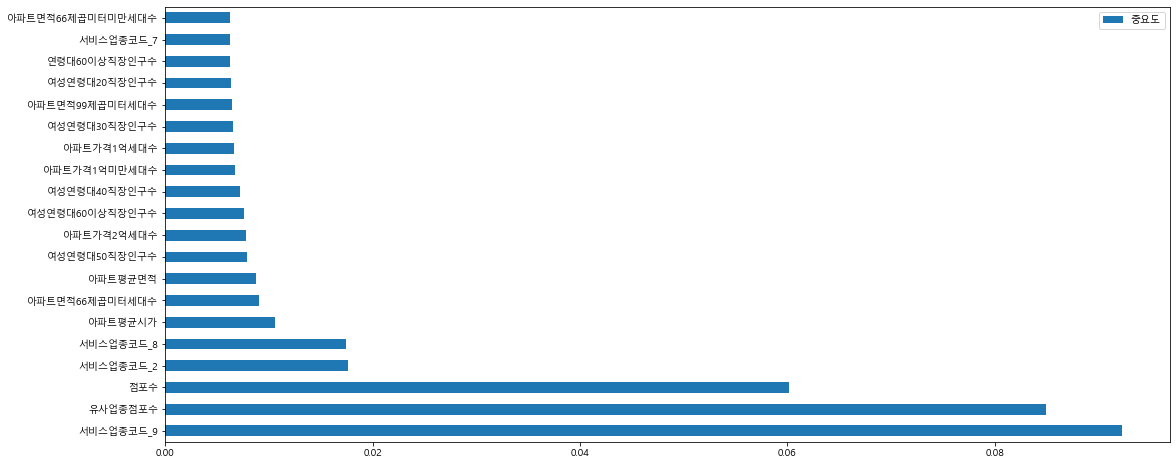

In [116]:
feature_importances_rf_model.sort_values(by='중요도', ascending=False)[:20].plot(kind='barh')

In [120]:
y_test

,분기당매출금액,분기당매출건수,주중매출금액,주말매출금액,월요일매출금액,화요일매출금액,수요일매출금액,목요일매출금액,금요일매출금액,토요일매출금액,...,시간대건수~24매출건수,남성매출건수,여성매출건수,연령대10매출건수,연령대20매출건수,연령대30매출건수,연령대40매출건수,연령대50매출건수,연령대60이상매출건수,분기당건수별매출금액
5927,17.909462,7.865572,17.627048,16.507194,16.017182,15.766570,16.129045,16.196076,15.922391,15.791086,...,5.638355,7.443078,6.566672,3.828641,6.363028,6.194405,6.546785,6.030685,5.283204,10.044317
4741,15.323000,4.644391,15.090537,13.749999,12.747533,13.978632,13.781603,13.596613,12.570198,11.697719,...,2.197225,4.510860,2.639057,0.000000,0.000000,0.000000,0.000000,4.553877,2.302585,10.688294
2131,19.560306,9.127285,19.201942,18.360263,17.187674,17.601898,17.522329,17.600173,17.917152,17.913719,...,7.641564,8.399535,8.410053,5.332719,8.415160,7.569412,6.864848,6.784457,6.082219,10.433159
9821,16.565273,5.846439,16.046449,15.660862,13.725209,14.245084,14.385349,14.638898,14.849463,14.758993,...,4.969813,5.365976,4.682131,0.000000,2.564949,4.007333,4.736198,4.682131,3.610918,10.721751
1158,19.308325,8.966101,18.965131,18.072171,17.023633,17.224264,17.579197,17.417718,17.443040,17.568078,...,8.210940,8.499844,7.872836,3.583519,6.270988,6.796824,7.541683,7.774015,7.507141,10.342384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8342,18.601178,8.658519,18.183087,17.527350,16.530592,16.735853,16.528946,16.594468,16.455682,16.744594,...,6.553933,8.251142,7.388946,4.718499,6.935370,7.198184,7.292337,6.918695,6.210600,9.942881
6675,19.857002,9.596962,19.668985,18.093241,18.024567,18.025798,17.947862,18.155155,18.129922,17.780775,...,7.253470,8.786915,8.644178,3.218876,8.142645,8.230311,7.608374,7.374629,7.247081,10.260143
4083,18.280420,8.240649,17.864680,17.202047,15.883412,16.059221,16.410009,16.277113,16.516864,16.559312,...,6.949856,7.536364,7.537963,3.044522,6.850126,6.999422,6.779922,6.320768,5.560682,10.040079
277,20.208244,11.267319,19.895937,18.892383,18.245054,18.333325,18.379571,18.232569,18.232699,18.431846,...,9.246286,10.563233,10.562819,7.277939,9.750628,9.746775,9.707473,9.553008,9.316770,8.941069


In [122]:
rf_pred = pd.DataFrame(pred, columns=y_test.columns)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test = np.expm1(y_test)
# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
rf_pred = np.expm1(rf_pred)

In [48]:
def get_top5_error_data(y_test, pred):
    
    for idx, col in enumerate(y_test.columns.tolist()):
        
        print(f'----------------{col}----------------')

        # DataFrame에 컬럼들로 실제 매출과 예측 값을 서로 비교 할 수 있도록 생성. 
        result_df = pd.DataFrame(y_test[col])
        result_df.columns = ['real_count']
        # 예측값(pred)을 'predicted_count' 컬럼에 넣기
        result_df['predicted_count']= np.round(pred[:,idx])
        # 실제값과 예측값과의 차이를 'diff' 컬럼에 넣기
        result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
        # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
        print(result_df.sort_values('diff', ascending=False)[:5])
        print('-'* 46)
    
get_top5_error_data(y_test,pred)

----------------분기당매출금액----------------
      real_count  predicted_count      diff
312     9.229358             15.0  5.770642
9422   12.894880             18.0  5.105120
7724   11.284958             16.0  4.715042
3037   16.162028             20.0  3.837972
8037   14.210093             18.0  3.789907
----------------------------------------------
----------------분기당매출건수----------------
      real_count  predicted_count      diff
9422    2.833213              8.0  5.166787
2759    1.945910              7.0  5.054090
7043    1.945910              7.0  5.054090
8037    2.944439              7.0  4.055561
6857    1.945910              6.0  4.054090
----------------------------------------------
----------------주중매출금액----------------
      real_count  predicted_count       diff
1869    0.000000             18.0  18.000000
1870    0.000000             18.0  18.000000
5143    0.000000             14.0  14.000000
321     0.000000             13.0  13.000000
9129   13.192027              7.0 

      real_count  predicted_count  diff
4842         0.0              6.0   6.0
1126         0.0              6.0   6.0
8037         0.0              6.0   6.0
5473         0.0              6.0   6.0
9422         0.0              6.0   6.0
----------------------------------------------
----------------연령대50매출건수----------------
       real_count  predicted_count  diff
6057          0.0              6.0   6.0
1116          0.0              5.0   5.0
7037          0.0              5.0   5.0
3827          0.0              5.0   5.0
10307         0.0              5.0   5.0
----------------------------------------------
----------------연령대60이상매출건수----------------
       real_count  predicted_count  diff
9209          0.0              7.0   7.0
10336         0.0              6.0   6.0
325           0.0              6.0   6.0
2573          0.0              6.0   6.0
10404         0.0              5.0   5.0
----------------------------------------------
----------------분기당건수별매출금액---------------

array([[<AxesSubplot:title={'center':'분기당매출금액'}>,
        <AxesSubplot:title={'center':'분기당매출건수'}>,
        <AxesSubplot:title={'center':'주중매출금액'}>,
        <AxesSubplot:title={'center':'주말매출금액'}>,
        <AxesSubplot:title={'center':'월요일매출금액'}>,
        <AxesSubplot:title={'center':'화요일매출금액'}>,
        <AxesSubplot:title={'center':'수요일매출금액'}>],
       [<AxesSubplot:title={'center':'목요일매출금액'}>,
        <AxesSubplot:title={'center':'금요일매출금액'}>,
        <AxesSubplot:title={'center':'토요일매출금액'}>,
        <AxesSubplot:title={'center':'일요일매출금액'}>,
        <AxesSubplot:title={'center':'시간대00~06매출금액'}>,
        <AxesSubplot:title={'center':'시간대06~11매출금액'}>,
        <AxesSubplot:title={'center':'시간대11~14매출금액'}>],
       [<AxesSubplot:title={'center':'시간대14~17매출금액'}>,
        <AxesSubplot:title={'center':'시간대17~21매출금액'}>,
        <AxesSubplot:title={'center':'시간대21~24매출금액'}>,
        <AxesSubplot:title={'center':'남성매출금액'}>,
        <AxesSubplot:title={'center':'여성매출금액'}>,
        <AxesSubplot:t

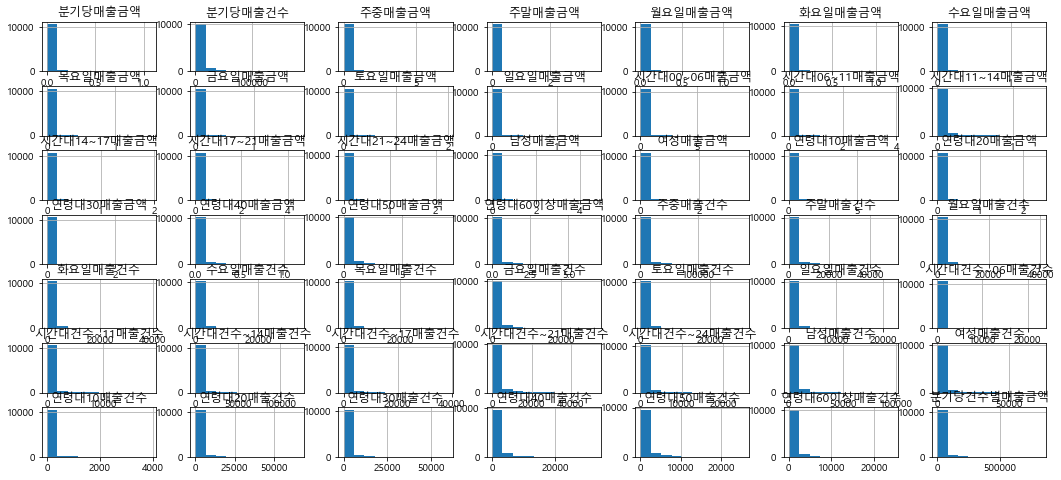

In [52]:
plt.rcParams['figure.figsize'] = 18, 8
Y = f.filter(regex='매출')
Y.hist()

array([[<AxesSubplot:title={'center':'분기당매출금액'}>,
        <AxesSubplot:title={'center':'분기당매출건수'}>,
        <AxesSubplot:title={'center':'주중매출금액'}>,
        <AxesSubplot:title={'center':'주말매출금액'}>,
        <AxesSubplot:title={'center':'월요일매출금액'}>,
        <AxesSubplot:title={'center':'화요일매출금액'}>,
        <AxesSubplot:title={'center':'수요일매출금액'}>],
       [<AxesSubplot:title={'center':'목요일매출금액'}>,
        <AxesSubplot:title={'center':'금요일매출금액'}>,
        <AxesSubplot:title={'center':'토요일매출금액'}>,
        <AxesSubplot:title={'center':'일요일매출금액'}>,
        <AxesSubplot:title={'center':'시간대00~06매출금액'}>,
        <AxesSubplot:title={'center':'시간대06~11매출금액'}>,
        <AxesSubplot:title={'center':'시간대11~14매출금액'}>],
       [<AxesSubplot:title={'center':'시간대14~17매출금액'}>,
        <AxesSubplot:title={'center':'시간대17~21매출금액'}>,
        <AxesSubplot:title={'center':'시간대21~24매출금액'}>,
        <AxesSubplot:title={'center':'남성매출금액'}>,
        <AxesSubplot:title={'center':'여성매출금액'}>,
        <AxesSubplot:t

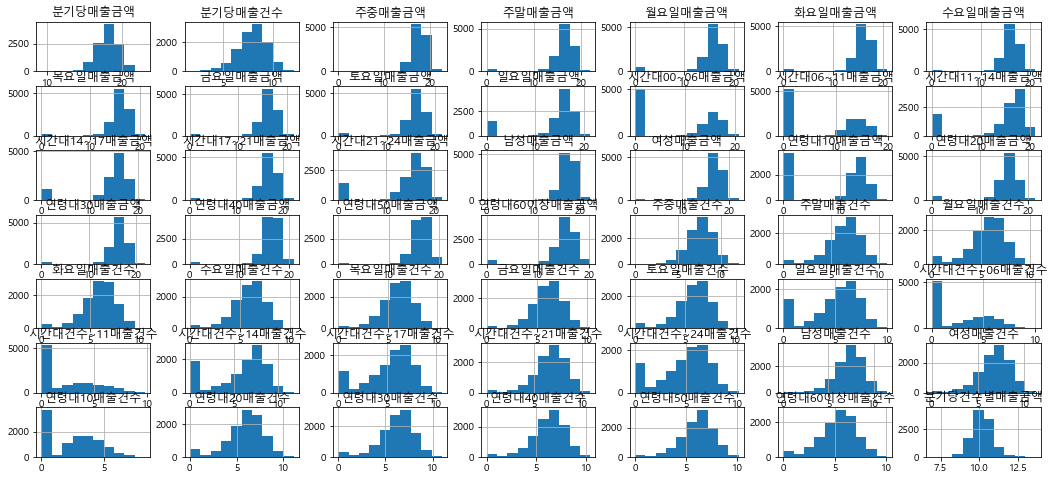

In [53]:
y_log = np.log1p(Y)
y_log.hist()

# 이상치 제거

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression#, Ridge, Lasso

Y = f.filter(regex='매출')
X = f.drop(f.filter(regex='매출').columns.tolist(), axis=1)
X = X.drop(X.filter(regex='명').columns.tolist(), axis=1)

X = pd.get_dummies(X, columns=['기준분기코드', '상권구분코드', '상권코드', '서비스업종코드', '행정동코드'])

In [19]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.01), 
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=None, verbose=0)
# 50개의 노드 수, 최대 50개의 샘플
# 1%의 outlier 색출.
clf.fit(X)
pred = clf.predict(X)
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())

 1    10810
-1      110
Name: anomaly, dtype: int64


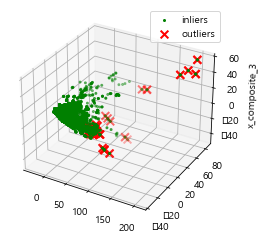

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3) 
scaler = StandardScaler()
#normalize the metrics
X_scaled = scaler.fit_transform(X)
X_reduce = pca.fit_transform(X_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

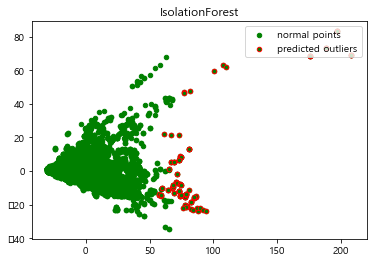

In [21]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_scaled)
res=pd.DataFrame(pca.transform(X_scaled))
Z = np.array(res)
plt.title("IsolationForest")
# plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1],
                c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()


In [22]:
X_out = X.drop(X.loc[X['anomaly']==-1].index)
Y_out = Y.drop(X.loc[X['anomaly']==-1].index)

In [23]:
from sklearn import preprocessing
#X_scaledStandard = preprocessing.StandardScaler().fit(X).transform(X) 
scaler = preprocessing.MinMaxScaler().fit(X_out)
X_scaledMinMax = scaler.transform(X_out)

y_log = np.log1p(Y_out)

In [24]:
X_scaledMinMax.shape

(10810, 2186)

In [25]:
outliers

,점포수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수,총직장인구수,남성직장인구수,여성직장인구수,...,행정동코드_11740590,행정동코드_11740600,행정동코드_11740610,행정동코드_11740620,행정동코드_11740640,행정동코드_11740650,행정동코드_11740660,행정동코드_11740685,행정동코드_11740700,anomaly
1129,6,6,17,1,17,1,0,2284,1108,1176,...,0,0,0,0,0,0,0,0,0,-1
1130,6,6,0,0,17,1,0,2284,1108,1176,...,0,0,0,0,0,0,0,0,0,-1
1131,6,7,14,1,0,0,1,2284,1108,1176,...,0,0,0,0,0,0,0,0,0,-1
1564,16,16,6,1,0,0,0,7107,2323,4784,...,0,0,0,0,0,0,0,0,0,-1
1565,15,15,0,0,7,1,0,7107,2323,4784,...,0,0,0,0,0,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168,9,9,0,0,0,0,0,368,263,105,...,0,0,0,0,0,0,0,0,0,-1
9390,8,8,13,1,0,0,0,646,250,396,...,0,0,0,0,0,0,0,0,0,-1
9391,3,3,0,0,0,0,0,646,250,396,...,0,0,0,0,0,0,0,0,0,-1
9397,5,5,0,0,0,0,0,646,250,396,...,0,0,0,0,0,0,0,0,0,-1


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaledMinMax, y_log, test_size=0.2, random_state=0)

## 딥러닝

In [79]:
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

warnings.filterwarnings("ignore", category=RuntimeWarning)

seed = 0
np.random.seed(seed)

In [92]:
print(X_train.shape, y_train.shape)

(8648, 2186) (8648, 49)


In [87]:
model = Sequential()
model.add(Dense(64, input_dim= X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(6, activation='relu'))
model.add(Dense(49))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

model.fit(X_train, y_train, epochs=1000, batch_size=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                139968    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_8 (Dense)              (None, 49)                343       
Total params: 140,957
Trainable params: 140,829
Non-trainable params: 128
_________________________________________________________________
Epoch 1/1000
865/865 [==============================] - 6s 778us/step - loss: 69.2762 - mse: 69.2762
Epoch 2/1000
865/865 [==============================] - 1s 794us/step - loss: 9.0816 - mse: 9.0816
Epoch 3/1000
865/865 [======================

865/865 [==============================] - 1s 754us/step - loss: 4.6180 - mse: 4.6180
Epoch 75/1000
865/865 [==============================] - 1s 751us/step - loss: 4.5796 - mse: 4.5796
Epoch 76/1000
865/865 [==============================] - 1s 772us/step - loss: 4.4393 - mse: 4.4393
Epoch 77/1000
865/865 [==============================] - 1s 754us/step - loss: 4.4656 - mse: 4.4656
Epoch 78/1000
865/865 [==============================] - 1s 758us/step - loss: 4.6057 - mse: 4.6057
Epoch 79/1000
865/865 [==============================] - 1s 751us/step - loss: 4.4414 - mse: 4.4414
Epoch 80/1000
865/865 [==============================] - 1s 748us/step - loss: 4.5380 - mse: 4.5380
Epoch 81/1000
865/865 [==============================] - 1s 742us/step - loss: 4.5441 - mse: 4.5441
Epoch 82/1000
865/865 [==============================] - 1s 742us/step - loss: 4.4926 - mse: 4.4926
Epoch 83/1000
865/865 [==============================] - 1s 750us/step - loss: 4.3750 - mse: 4.3750
Epoch 84/1000


865/865 [==============================] - 1s 758us/step - loss: 3.8108 - mse: 3.8108
Epoch 237/1000
865/865 [==============================] - 1s 750us/step - loss: 3.7479 - mse: 3.7479
Epoch 238/1000
865/865 [==============================] - 1s 761us/step - loss: 3.8074 - mse: 3.8074
Epoch 239/1000
865/865 [==============================] - 1s 749us/step - loss: 3.7079 - mse: 3.7079
Epoch 240/1000
865/865 [==============================] - 1s 764us/step - loss: 3.7226 - mse: 3.7226
Epoch 241/1000
865/865 [==============================] - 1s 782us/step - loss: 3.8517 - mse: 3.8517
Epoch 242/1000
865/865 [==============================] - 1s 758us/step - loss: 3.8166 - mse: 3.8166
Epoch 243/1000
865/865 [==============================] - 1s 749us/step - loss: 3.7512 - mse: 3.7512
Epoch 244/1000
865/865 [==============================] - 1s 755us/step - loss: 3.7670 - mse: 3.7670
Epoch 245/1000
865/865 [==============================] - 1s 753us/step - loss: 3.8171 - mse: 3.8171
Epoch

865/865 [==============================] - 1s 769us/step - loss: 3.6044 - mse: 3.6044
Epoch 399/1000
865/865 [==============================] - 1s 771us/step - loss: 3.4547 - mse: 3.4547
Epoch 400/1000
865/865 [==============================] - 1s 771us/step - loss: 3.5805 - mse: 3.5805
Epoch 401/1000
865/865 [==============================] - 1s 766us/step - loss: 3.5219 - mse: 3.5219
Epoch 402/1000
865/865 [==============================] - 1s 758us/step - loss: 3.5366 - mse: 3.5366
Epoch 403/1000
865/865 [==============================] - 1s 761us/step - loss: 3.5854 - mse: 3.5854
Epoch 404/1000
865/865 [==============================] - 1s 758us/step - loss: 3.5678 - mse: 3.5678
Epoch 405/1000
865/865 [==============================] - 1s 761us/step - loss: 3.5561 - mse: 3.5561
Epoch 406/1000
865/865 [==============================] - 1s 763us/step - loss: 3.4565 - mse: 3.4565
Epoch 407/1000
865/865 [==============================] - 1s 762us/step - loss: 3.6460 - mse: 3.6460
Epoch

865/865 [==============================] - 1s 744us/step - loss: 3.3839 - mse: 3.3839
Epoch 561/1000
865/865 [==============================] - 1s 749us/step - loss: 3.3985 - mse: 3.3985
Epoch 562/1000
865/865 [==============================] - 1s 747us/step - loss: 3.3822 - mse: 3.3822
Epoch 563/1000
865/865 [==============================] - 1s 747us/step - loss: 3.4096 - mse: 3.4096
Epoch 564/1000
865/865 [==============================] - 1s 744us/step - loss: 3.3937 - mse: 3.3937
Epoch 565/1000
865/865 [==============================] - 1s 746us/step - loss: 3.3408 - mse: 3.3408
Epoch 566/1000
865/865 [==============================] - 1s 749us/step - loss: 3.4428 - mse: 3.4428
Epoch 567/1000
865/865 [==============================] - 1s 746us/step - loss: 3.4030 - mse: 3.4030
Epoch 568/1000
865/865 [==============================] - 1s 758us/step - loss: 3.3888 - mse: 3.3888
Epoch 569/1000
865/865 [==============================] - 1s 763us/step - loss: 3.3391 - mse: 3.3391
Epoch

865/865 [==============================] - 1s 768us/step - loss: 3.2582 - mse: 3.2582
Epoch 723/1000
865/865 [==============================] - 1s 749us/step - loss: 3.3275 - mse: 3.3275
Epoch 724/1000
865/865 [==============================] - 1s 757us/step - loss: 3.2614 - mse: 3.2614
Epoch 725/1000
865/865 [==============================] - 1s 743us/step - loss: 3.2658 - mse: 3.2658
Epoch 726/1000
865/865 [==============================] - 1s 782us/step - loss: 3.3554 - mse: 3.3554
Epoch 727/1000
865/865 [==============================] - 1s 765us/step - loss: 3.2842 - mse: 3.2842
Epoch 728/1000
865/865 [==============================] - 1s 746us/step - loss: 3.3238 - mse: 3.3238
Epoch 729/1000
865/865 [==============================] - 1s 722us/step - loss: 3.2887 - mse: 3.2887
Epoch 730/1000
865/865 [==============================] - 1s 733us/step - loss: 3.2309 - mse: 3.2309
Epoch 731/1000
865/865 [==============================] - 1s 739us/step - loss: 3.3438 - mse: 3.3438
Epoch

865/865 [==============================] - 1s 765us/step - loss: 3.1442 - mse: 3.1442
Epoch 885/1000
865/865 [==============================] - 1s 773us/step - loss: 3.2191 - mse: 3.2191
Epoch 886/1000
865/865 [==============================] - 1s 772us/step - loss: 3.1877 - mse: 3.1877
Epoch 887/1000
865/865 [==============================] - 1s 770us/step - loss: 3.2720 - mse: 3.2720
Epoch 888/1000
865/865 [==============================] - 1s 767us/step - loss: 3.2449 - mse: 3.2449
Epoch 889/1000
865/865 [==============================] - 1s 763us/step - loss: 3.1948 - mse: 3.1948
Epoch 890/1000
865/865 [==============================] - 1s 765us/step - loss: 3.2473 - mse: 3.2473
Epoch 891/1000
865/865 [==============================] - 1s 751us/step - loss: 3.1423 - mse: 3.1423
Epoch 892/1000
865/865 [==============================] - 1s 747us/step - loss: 3.1952 - mse: 3.1952
Epoch 893/1000
865/865 [==============================] - 1s 760us/step - loss: 3.2405 - mse: 3.2405
Epoch

In [90]:
# 예측 값과 실제 값의 비교
pred = model.predict(X_test).flatten()
pred = pred.reshape(-1,49)
np.array(y_test)

pred_reshape = np.array(pred).reshape(-1,49)
pred_reshape = pd.DataFrame(pred_reshape)
pred_reshape.columns = y_test.columns

log_y_test = np.log1p(y_test)
log_pred = np.log1p(pred_reshape)

squared_error = (log_y_test - log_pred) ** 2
rmsle_DL = np.sqrt(np.mean(squared_error))

print('###',model.__class__.__name__,'###')
rmsle_DL

### Sequential ###


분기당매출금액         0.158335
분기당매출건수         0.304661
주중매출금액          0.228517
주말매출금액          0.549310
월요일매출금액         0.588584
화요일매출금액         0.400906
수요일매출금액         0.388203
목요일매출금액         0.304877
금요일매출금액         0.390792
토요일매출금액         0.601964
일요일매출금액         1.077230
시간대00~06매출금액    1.843880
시간대06~11매출금액    1.774763
시간대11~14매출금액    1.231594
시간대14~17매출금액    0.906570
시간대17~21매출금액    0.422800
시간대21~24매출금액    0.923834
남성매출금액          0.179663
여성매출금액          0.389714
연령대10매출금액       1.559168
연령대20매출금액       0.698889
연령대30매출금액       0.556347
연령대40매출금액       0.523304
연령대50매출금액       0.403409
연령대60이상매출금액     0.405495
주중매출건수          0.331502
주말매출건수          0.539745
월요일매출건수         0.611180
화요일매출건수         0.502047
수요일매출건수         0.462645
목요일매출건수         0.454258
금요일매출건수         0.480969
토요일매출건수         0.574269
일요일매출건수         0.859139
시간대건수~06매출건수    1.351605
시간대건수~11매출건수    1.256659
시간대건수~14매출건수    0.910625
시간대건수~17매출건수    0.778112
시간대건수~21매출건수    0.463679
시간대건수~24매출건수    0.738724


In [34]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)   # standardScaler => 통계화 시킴.

In [35]:
from sklearn import preprocessing
#X_scaledStandard = preprocessing.StandardScaler().fit(X).transform(X) 
scaler = preprocessing.MinMaxScaler().fit(X_out)
X_scaledMinMax = scaler.transform(X_out)

y_log = np.log1p(Y_out)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_scaledMinMax, y_log, test_size=0.2, random_state=0)

In [38]:
pd.DataFrame(X_train).keys()

RangeIndex(start=0, stop=2186, step=1)

In [73]:
import tensorflow as tf
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim= X_train.shape[1]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(49)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [74]:
model = build_model()

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                139968    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (None, 49)                3185      
Total params: 159,729
Trainable params: 159,729
Non-trainable params: 0
_________________________________________________________________


In [76]:
example_batch = X_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-3.65333930e-02, -3.01920045e-02, -2.95154359e-02,
         4.88294885e-02, -3.96706723e-03, -9.21370462e-03,
         5.54046817e-02, -4.48667184e-02,  1.32758953e-02,
         3.17149051e-02,  3.79587486e-02,  3.03421766e-02,
         7.31632113e-03, -4.33146171e-02, -3.99883948e-02,
        -1.51203498e-02,  8.21966038e-04,  5.51926307e-02,
         7.23796291e-03,  4.98643555e-02, -1.61366593e-02,
        -4.46184054e-02, -3.07736769e-02, -1.34645170e-02,
        -2.36302968e-02, -3.12540457e-02, -1.11874379e-03,
        -1.01859212e-01, -3.19109708e-02,  4.85303588e-02,
         5.51609583e-02, -2.79953261e-03, -3.56000173e-03,
        -3.56223509e-02,  6.98538721e-02,  1.10457791e-02,
         2.38830149e-02,  7.00301677e-02, -1.33490497e-02,
         2.00934391e-02, -7.37226531e-02, -5.70338480e-02,
         3.01423818e-02,  4.62978780e-02, -7.44656697e-02,
         5.83385378e-02,  1.98977794e-02, -3.95131372e-02,
        -4.62947413e-02],
       [ 1.67345174e-03, -1.40

In [80]:
# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [81]:
pred = model.predict(X_test)

In [82]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.722236,0.489503,0.722236,5.878498,1.170771,5.878498,995
996,0.719432,0.484300,0.719432,5.920759,1.182020,5.920759,996
997,0.714851,0.484777,0.714851,6.066467,1.207671,6.066467,997
998,0.727301,0.488573,0.727301,5.998831,1.199823,5.998831,998
999,0.722159,0.484877,0.722159,5.923840,1.185365,5.923840,999


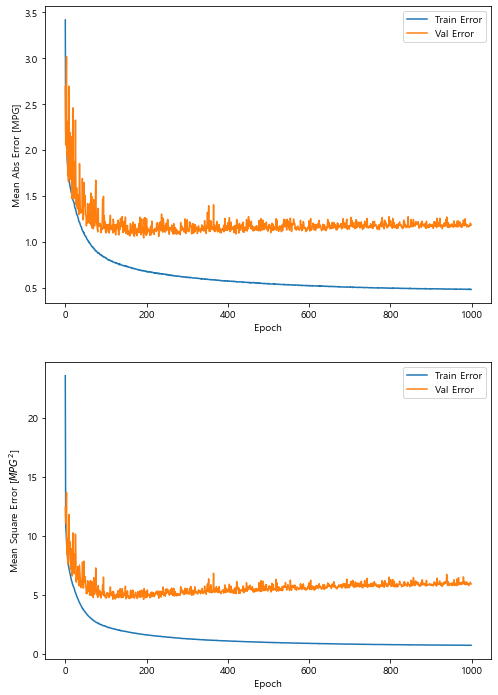

In [83]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


................................

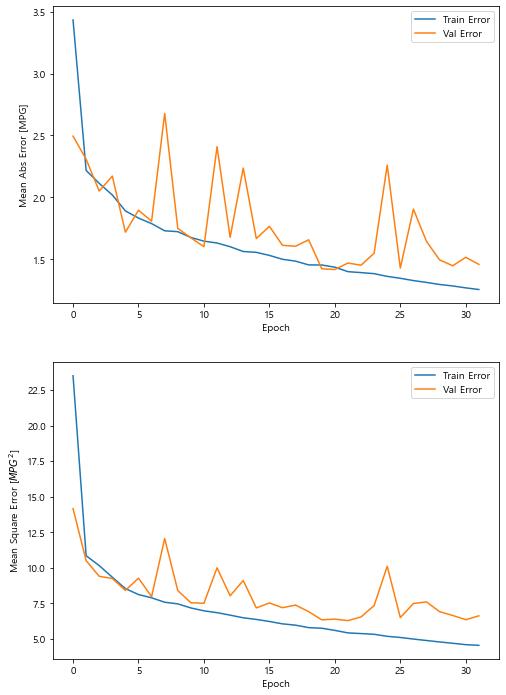

In [84]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

## 코사인 유사도 구하기

In [99]:
f['cate_code'] = f['기준분기코드'].astype(str)+'분기 '+f['상권구분코드명']+'-'+f['상권코드명'].astype(str)+'-'+f['서비스업종코드명']+'-'+f['행정동코드'].astype(str)

In [100]:
from sklearn.feature_extraction.text import CountVectorizer  # 피체 벡터화
from sklearn.metrics.pairwise import cosine_similarity  # 코사인 유사도

count_vect_category = CountVectorizer(min_df=0, ngram_range=(1,2))
place_category = count_vect_category.fit_transform(f['cate_code']) 
place_simi_cate = cosine_similarity(place_category, place_category) 
place_simi_cate_sorted_ind = place_simi_cate.argsort()[:, ::-1]

In [101]:
place_simi_cate

array([[1.        , 0.84615385, 0.84615385, ..., 0.        , 0.        ,
        0.        ],
       [0.84615385, 1.        , 0.84615385, ..., 0.        , 0.        ,
        0.        ],
       [0.84615385, 0.84615385, 1.        , ..., 0.09245003, 0.09245003,
        0.09245003],
       ...,
       [0.        , 0.        , 0.09245003, ..., 1.        , 0.33333333,
        0.33333333],
       [0.        , 0.        , 0.09245003, ..., 0.33333333, 1.        ,
        0.44444444],
       [0.        , 0.        , 0.09245003, ..., 0.33333333, 0.44444444,
        1.        ]])

In [102]:
place_simi_cate_sorted_ind

array([[    0,     1,     2, ...,  6412,  6413,  5459],
       [    1,     0,     2, ...,  5076,  9142, 10919],
       [    2,     0,     1, ...,  5063,  5064,  5459],
       ...,
       [10917,  9638,  9619, ...,  1287,  1288,     0],
       [10918,  9740, 10919, ...,  1012,  1013,     0],
       [10919, 10602, 10243, ...,  1333,  1335,     0]], dtype=int64)

In [103]:
len(f['cate_code'].unique())

10920

In [104]:
len(f)

10920

In [105]:
f.columns

Index(['기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드', '서비스업종코드명',
       '분기당매출금액', '분기당매출건수', '주중매출금액',
       ...
       '여성연령대60이상토요일시간대6유동인구수', '여성연령대60이상일요일시간대1유동인구수',
       '여성연령대60이상일요일시간대2유동인구수', '여성연령대60이상일요일시간대3유동인구수',
       '여성연령대60이상일요일시간대4유동인구수', '여성연령대60이상일요일시간대5유동인구수',
       '여성연령대60이상일요일시간대6유동인구수', '행정동코드', '분기당건수별매출금액', 'cate_code'],
      dtype='object', length=627)

In [106]:
cost_matrix = f[['cate_code', '월요일매출금액', '화요일매출금액',
       '수요일매출금액', '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액']]

cost_matrix = cost_matrix.fillna(0)
cost_matrix.index = cost_matrix.cate_code
cost_matrix = cost_matrix.drop('cate_code', axis=1)

cost_matrix

In [110]:
# 아이템-유저 매트릭스로부터 코사인 유사도 구하기
item_sim = cosine_similarity(cost_matrix, cost_matrix)

# cosine_similarity()로 반환된 넘파이 행렬에 카테고리명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=cost_matrix.index,
                          columns=cost_matrix.index)

print(item_sim_df.shape)
item_sim_df.head(3)

(10920, 10920)


cate_code,4분기 관광특구-이태원 관광특구-중식음식점-11170650,3분기 관광특구-이태원 관광특구-중식음식점-11170650,1분기 관광특구-이태원 관광특구-중식음식점-11170650,4분기 전통시장-길동복조리시장-호프-간이주점-11740685,4분기 전통시장-길동복조리시장-일식음식점-11740685,3분기 전통시장-길동복조리시장-호프-간이주점-11740685,3분기 전통시장-길동복조리시장-한식음식점-11740685,2분기 전통시장-길동복조리시장-호프-간이주점-11740685,2분기 전통시장-길동복조리시장-일식음식점-11740685,1분기 전통시장-길동복조리시장-호프-간이주점-11740685,...,1분기 골목상권-홍제내길-호프-간이주점-11410620,2분기 골목상권-한천로109길-분식전문점-11305606,2분기 골목상권-다산로36길-치킨전문점-11140665,1분기 발달상권-서울 종로구 종로5가역_4-한식음식점-11110615,1분기 발달상권-서울 광진구 군자역-중식음식점-11215730,1분기 발달상권-서울 관악구 신림역_3-일식음식점-11620695,1분기 발달상권-문정역-치킨전문점-11710641,1분기 골목상권-능동로19길-양식음식점-11215710,1분기 골목상권-왕십리로6길-분식전문점-11200660,1분기 골목상권-숭인동길-분식전문점-11110710
cate_code,,,,,,,,,,,,,,,,,,,,,
4분기 관광특구-이태원 관광특구-중식음식점-11170650,1.000000,0.996172,0.990289,0.901422,0.960041,0.920940,0.980080,0.951745,0.924717,0.866465,...,0.977200,0.948298,0.934077,0.886978,0.911792,0.989832,0.379152,0.479198,0.953749,0.956814
3분기 관광특구-이태원 관광특구-중식음식점-11170650,0.996172,1.000000,0.992283,0.902168,0.935949,0.928104,0.980968,0.952857,0.907538,0.879365,...,0.971071,0.958785,0.938856,0.897472,0.896640,0.984630,0.378590,0.424428,0.957744,0.953854
1분기 관광특구-이태원 관광특구-중식음식점-11170650,0.990289,0.992283,1.000000,0.895674,0.928660,0.937732,0.965546,0.920036,0.897573,0.866944,...,0.959302,0.950360,0.942979,0.895765,0.863040,0.993393,0.309973,0.471565,0.950444,0.940732


In [111]:
# 해당 상권과 유사도가 높은 상권 5개만 추출하기
item_sim_df['1분기 골목상권-능동로19길-양식음식점-11215710'].sort_values(ascending=False)[:10]

cate_code
4분기 골목상권-삼양로20길-중식음식점-11305555        1.000000
4분기 골목상권-학동로77길-양식음식점-11680565        1.000000
3분기 골목상권-학동로6길-호프-간이주점-11680521       1.000000
3분기 골목상권-한천로124나길-호프-간이주점-11305590    1.000000
2분기 발달상권-장안동사거리-중식음식점-11230660        1.000000
1분기 골목상권-신길로17길-중식음식점-11560670        1.000000
1분기 골목상권-능동로19길-양식음식점-11215710        1.000000
4분기 골목상권-용답중앙길-호프-간이주점-11200790       1.000000
2분기 골목상권-천호대로187길-분식전문점-11740685      0.997863
3분기 골목상권-증가로20가길-양식음식점-11410720       0.993533
Name: 1분기 골목상권-능동로19길-양식음식점-11215710, dtype: float64

## 코사인 유사도 구하기

In [112]:
from sklearn.feature_extraction.text import CountVectorizer  # 피체 벡터화
from sklearn.metrics.pairwise import cosine_similarity  # 코사인 유사도

count_vect_category = CountVectorizer(min_df=0, ngram_range=(1,2))
place_category = count_vect_category.fit_transform(f['cate_code']) 
place_simi_cate = cosine_similarity(place_category, place_category) 
place_simi_cate_sorted_ind = place_simi_cate.argsort()[:, ::-1]

In [117]:
cost_matrix = f
cost_matrix = cost_matrix.fillna(0)
cost_matrix.index = cost_matrix.cate_code
cost_matrix = cost_matrix.drop('cate_code', axis=1)

In [118]:
cost_matrix = cost_matrix.drop(cost_matrix.filter(regex='명').columns.tolist(), axis=1)

In [119]:
# 아이템-유저 매트릭스로부터 코사인 유사도 구하기
item_sim = cosine_similarity(cost_matrix, cost_matrix)

# cosine_similarity()로 반환된 넘파이 행렬에 카테고리명을 매핑해 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=cost_matrix.index,
                          columns=cost_matrix.index)

print(item_sim_df.shape)
item_sim_df.head(3)

(10920, 10920)


cate_code,4분기 관광특구-이태원 관광특구-중식음식점-11170650,3분기 관광특구-이태원 관광특구-중식음식점-11170650,1분기 관광특구-이태원 관광특구-중식음식점-11170650,4분기 전통시장-길동복조리시장-호프-간이주점-11740685,4분기 전통시장-길동복조리시장-일식음식점-11740685,3분기 전통시장-길동복조리시장-호프-간이주점-11740685,3분기 전통시장-길동복조리시장-한식음식점-11740685,2분기 전통시장-길동복조리시장-호프-간이주점-11740685,2분기 전통시장-길동복조리시장-일식음식점-11740685,1분기 전통시장-길동복조리시장-호프-간이주점-11740685,...,1분기 골목상권-홍제내길-호프-간이주점-11410620,2분기 골목상권-한천로109길-분식전문점-11305606,2분기 골목상권-다산로36길-치킨전문점-11140665,1분기 발달상권-서울 종로구 종로5가역_4-한식음식점-11110615,1분기 발달상권-서울 광진구 군자역-중식음식점-11215730,1분기 발달상권-서울 관악구 신림역_3-일식음식점-11620695,1분기 발달상권-문정역-치킨전문점-11710641,1분기 골목상권-능동로19길-양식음식점-11215710,1분기 골목상권-왕십리로6길-분식전문점-11200660,1분기 골목상권-숭인동길-분식전문점-11110710
cate_code,,,,,,,,,,,,,,,,,,,,,
4분기 관광특구-이태원 관광특구-중식음식점-11170650,1.000000,0.998605,0.993324,0.474832,0.705582,0.498813,0.914251,0.507227,0.694109,0.492134,...,0.548497,0.958519,0.912346,0.868435,0.552548,0.875469,0.336884,0.335202,0.960447,0.941299
3분기 관광특구-이태원 관광특구-중식음식점-11170650,0.998605,1.000000,0.996749,0.441890,0.678280,0.467159,0.919269,0.475908,0.667413,0.460355,...,0.518776,0.956399,0.921250,0.872758,0.520316,0.857699,0.301693,0.300057,0.969654,0.939959
1분기 관광특구-이태원 관광특구-중식음식점-11170650,0.993324,0.996749,1.000000,0.408377,0.653260,0.434681,0.931413,0.444230,0.642610,0.427523,...,0.489555,0.962573,0.937156,0.883790,0.487296,0.847303,0.263658,0.262016,0.979228,0.946653


In [120]:
# 해당 상권과 유사도가 높은 상권 5개만 추출하기
item_sim_df['1분기 골목상권-능동로19길-양식음식점-11215710'].sort_values(ascending=False)[:10]

cate_code
1분기 골목상권-능동로19길-양식음식점-11215710    1.000000
1분기 골목상권-삼양로20길-중식음식점-11305555    0.999991
1분기 골목상권-삼양로20길-분식전문점-11305555    0.999990
1분기 골목상권-덕릉로60길-분식전문점-11320513    0.999989
4분기 골목상권-삼양로20길-분식전문점-11305555    0.999989
4분기 전통시장-대림중앙시장-중식음식점-11560710    0.999985
3분기 골목상권-삼양로20길-중식음식점-11305555    0.999984
2분기 골목상권-삼양로20길-분식전문점-11305555    0.999982
4분기 골목상권-삼양로20길-중식음식점-11305555    0.999982
2분기 골목상권-삼양로20길-중식음식점-11305555    0.999976
Name: 1분기 골목상권-능동로19길-양식음식점-11215710, dtype: float64